In [1]:
!pip install numpy===1.19.2
!pip install umap-learn==0.5.0
!pip install hdbscan==0.8.26
!pip install joblib==0.17.0
!pip install top2vec

     |████████████████████████████████| 14.5MB 5.1MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


     |████████████████████████████████| 4.7MB 5.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301719 sha256=0540fc6ea5695d9dc53b1ce4f8ef6bd65eb04cde24c33df6e717a20fc786db66
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan
     |████████████████████████████████| 307kB 4.1MB/s 
  Found existing installation: joblib 1.0.0
    Uninstalling joblib-1.0.0:
      Successfully uninstalled joblib-1.0.0


In [2]:
import json
from top2vec import Top2Vec

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
with open("/content/drive/MyDrive/RuBase/Deterrence/Vizzes/Russian deterrence/Topic modeling/210119_en_deter_preprocessed.json", "r") as f:
  corpus = json.load(f)

docs = [doc.get("fulltext", "") for doc in corpus if not doc.get("fulltext", "").startswith("Not available.")]

In [35]:
len(docs)

26525

In [5]:
model = Top2Vec(documents=docs, speed="fast-learn", workers=8)

2021-02-06 15:07:04,451 - top2vec - INFO - Pre-processing documents for training
2021-02-06 15:09:44,060 - top2vec - INFO - Creating joint document/word embedding
2021-02-06 20:05:42,434 - top2vec - INFO - Creating lower dimension embedding of documents
2021-02-06 20:06:45,020 - top2vec - INFO - Finding dense areas of documents
2021-02-06 20:06:49,561 - top2vec - INFO - Finding topics


In [6]:
# model.save("/content/drive/MyDrive/RuBase/Deterrence/Vizzes/Russian deterrence/Topic modeling/210205 - top2vec.model")

---

In [7]:
model = Top2Vec.load("/content/drive/MyDrive/RuBase/Deterrence/Vizzes/Russian deterrence/Topic modeling/210205 - top2vec.model")

## Basics

In [8]:
model.get_num_topics()

215

In [10]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [11]:
topic_sizes

array([702, 596, 587, 586, 576, 418, 402, 386, 377, 365, 337, 319, 304,
       294, 292, 264, 262, 259, 256, 252, 243, 242, 241, 240, 239, 231,
       224, 216, 212, 205, 204, 202, 199, 199, 189, 185, 184, 182, 180,
       179, 178, 174, 174, 171, 168, 167, 162, 161, 161, 161, 156, 152,
       151, 151, 151, 150, 146, 146, 144, 142, 141, 140, 137, 137, 137,
       136, 135, 133, 132, 129, 126, 123, 121, 120, 120, 119, 119, 119,
       119, 118, 118, 115, 114, 114, 113, 112, 110, 108, 108, 107, 106,
       106, 106, 105, 104, 104, 103, 103, 102,  99,  98,  98,  97,  94,
        94,  92,  92,  91,  90,  90,  90,  89,  88,  88,  86,  86,  84,
        84,  82,  81,  81,  78,  78,  78,  78,  77,  76,  76,  76,  75,
        75,  74,  72,  71,  71,  70,  70,  70,  69,  69,  67,  67,  66,
        65,  65,  64,  63,  63,  62,  60,  60,  59,  59,  59,  58,  58,
        57,  56,  56,  56,  55,  55,  55,  54,  53,  53,  52,  52,  52,
        51,  50,  50,  49,  49,  46,  45,  44,  44,  44,  44,  4

In [12]:
topic_nums

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [16]:
# keep in mind that it doesn't return topic #5 but all topics from 0 to 5
topic_words, word_scores, topic_nums = model.get_topics(5)

In [17]:
topic_words

array([['labour', 'trident', 'tory', 'faslane', 'tories', 'corbyn',
        'scotland', 'salmond', 'britain', 'cameron', 'snp', 'mps',
        'westminster', 'scottish', 'miliband', 'whitehall', 'clegg',
        'devonport', 'sturgeon', 'dems', 'scots', 'gbp', 'mp', 'nhs',
        'uk', 'british', 'theresa', 'brexit', 'jeremy', 'cnd', 'glasgow',
        'clyde', 'sdsr', 'campaigners', 'sdr', 'hms', 'plymouth',
        'blair', 'barrow', 'lib', 'attlee', 'conservatives',
        'campaigner', 'rifkind', 'authorise', 'tony', 'livingstone',
        'raf', 'liam', 'fallon'],
       ['kohl', 'genscher', 'gorbachev', 'bonn', 'shevardnadze',
        'euromissile', 'helmut', 'pershings', 'pershing', 'mikhail',
        'woerner', 'germans', 'mitterrand', 'dietrich', 'soviet',
        'europeans', 'soviets', 'eduard', 'warsaw', 'shultz',
        'reykjavik', 'german', 'thatcher', 'reagan', 'euromissiles',
        'shorter', 'mbfr', 'proposals', 'western', 'brussels', 'gromyko',
        'ruhe', '

In [18]:
word_scores

array([[0.6810405 , 0.667028  , 0.6356904 , 0.62727034, 0.6230256 ,
        0.61814743, 0.60895574, 0.6056795 , 0.59425265, 0.59082353,
        0.5765108 , 0.5758268 , 0.57212514, 0.5681891 , 0.5506225 ,
        0.5411618 , 0.5376398 , 0.5362191 , 0.53097326, 0.5232389 ,
        0.50550914, 0.4982001 , 0.49599573, 0.49359825, 0.4899417 ,
        0.48734817, 0.4787486 , 0.47717232, 0.46752274, 0.4629266 ,
        0.46168244, 0.4611985 , 0.4536062 , 0.45335963, 0.451256  ,
        0.44855705, 0.44756937, 0.441996  , 0.4400505 , 0.43884638,
        0.4359499 , 0.43151963, 0.43133298, 0.42986813, 0.42828858,
        0.4268664 , 0.424089  , 0.42342415, 0.42133433, 0.41948473],
       [0.6908315 , 0.6603337 , 0.64237005, 0.6229921 , 0.60356474,
        0.5931416 , 0.58696544, 0.5570563 , 0.55579793, 0.5520494 ,
        0.53854334, 0.5380538 , 0.52884454, 0.5184906 , 0.5156091 ,
        0.51264393, 0.51153076, 0.5090275 , 0.50566965, 0.49987417,
        0.49697128, 0.49537867, 0.49470642, 0.4

In [19]:
topic_nums

array([0, 1, 2, 3, 4])

## Search Topics

In [21]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(
    keywords=["russia", "ukraine"], 
#     keywords_neg=[],
    num_topics=5 # return top 5 topics?
)

In [22]:
topic_words

[array(['baltic', 'nato', 'baltics', 'lithuania', 'efp', 'latvia',
        'ukraine', 'crimea', 'estonia', 'poland', 'flank', 'estonian',
        'russian', 'eastern', 'russia', 'rotational', 'riga', 'ukrainian',
        'vjtf', 'europe', 'moldova', 'romania', 'natos', 'reassurance',
        'latvian', 'nrf', 'annexation', 'allies', 'breedlove', 'polish',
        'eri', 'warsaw', 'kaliningrad', 'minsk', 'lithuanian', 'european',
        'transnistria', 'putin', 'brussels', 'prepositioning',
        'stoltenberg', 'eu', 'bulgaria', 'ilves', 'donbas', 'atlantic',
        'zapad', 'kiev', 'vilnius', 'ukrainians'], dtype='<U15'),
 array(['inf', 'intermediate', 'moscow', 'russia', 'treaty', 'glcm',
        'withdrawal', 'ssc', 'russian', 'violating', 'arms', 'withdraw',
        'agreements', 'withdrew', 'ryabkov', 'violation', 'treaties',
        'abm', 'compliance', 'withdrawing', 'kremlin', 'shorter',
        'missiles', 'mikhail', 'vladimir', 'limiting', 'putin',
        'violations', 'r

In [23]:
topic_scores

array([0.59010369, 0.43991255, 0.43414083, 0.4314199 , 0.41791958])

In [24]:
topic_nums

array([ 21,  54, 107,  13,  95])

Topic *21* was the most similar topic to "*russia*" and "*ukraine*" with a cosine similarity of *0.59010369* (Values can be from least similar 0, to most similar 1)

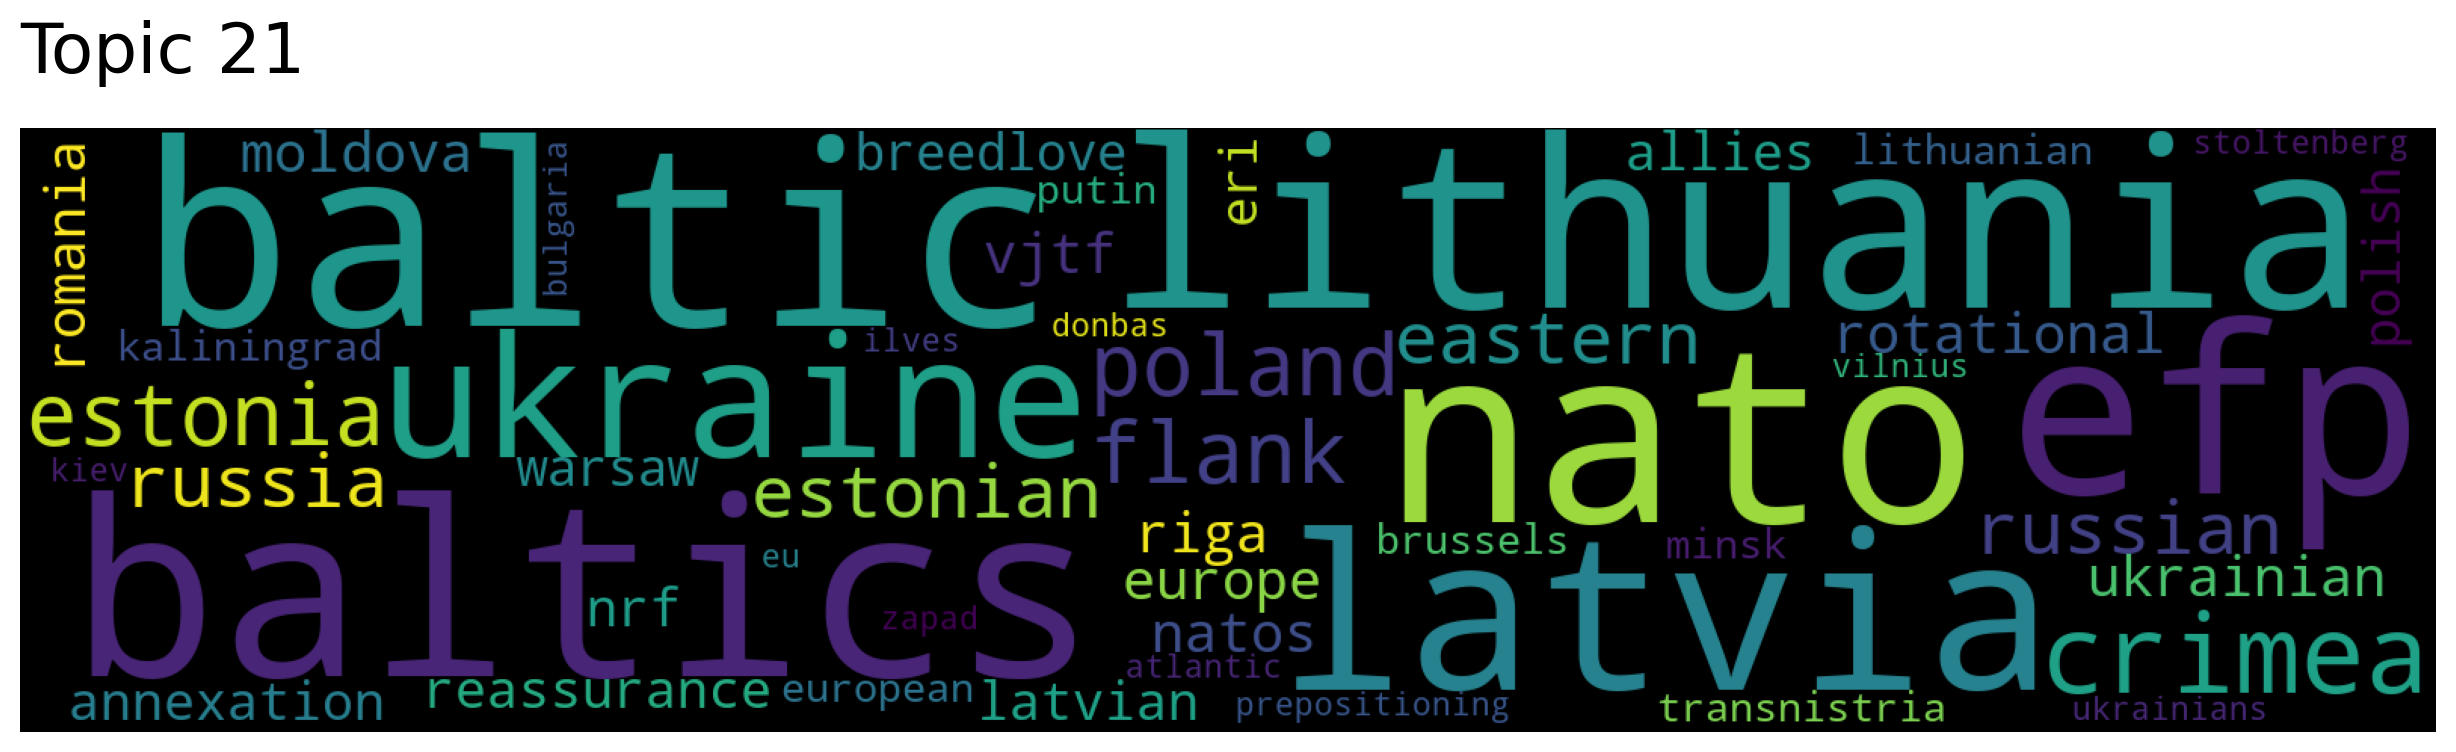

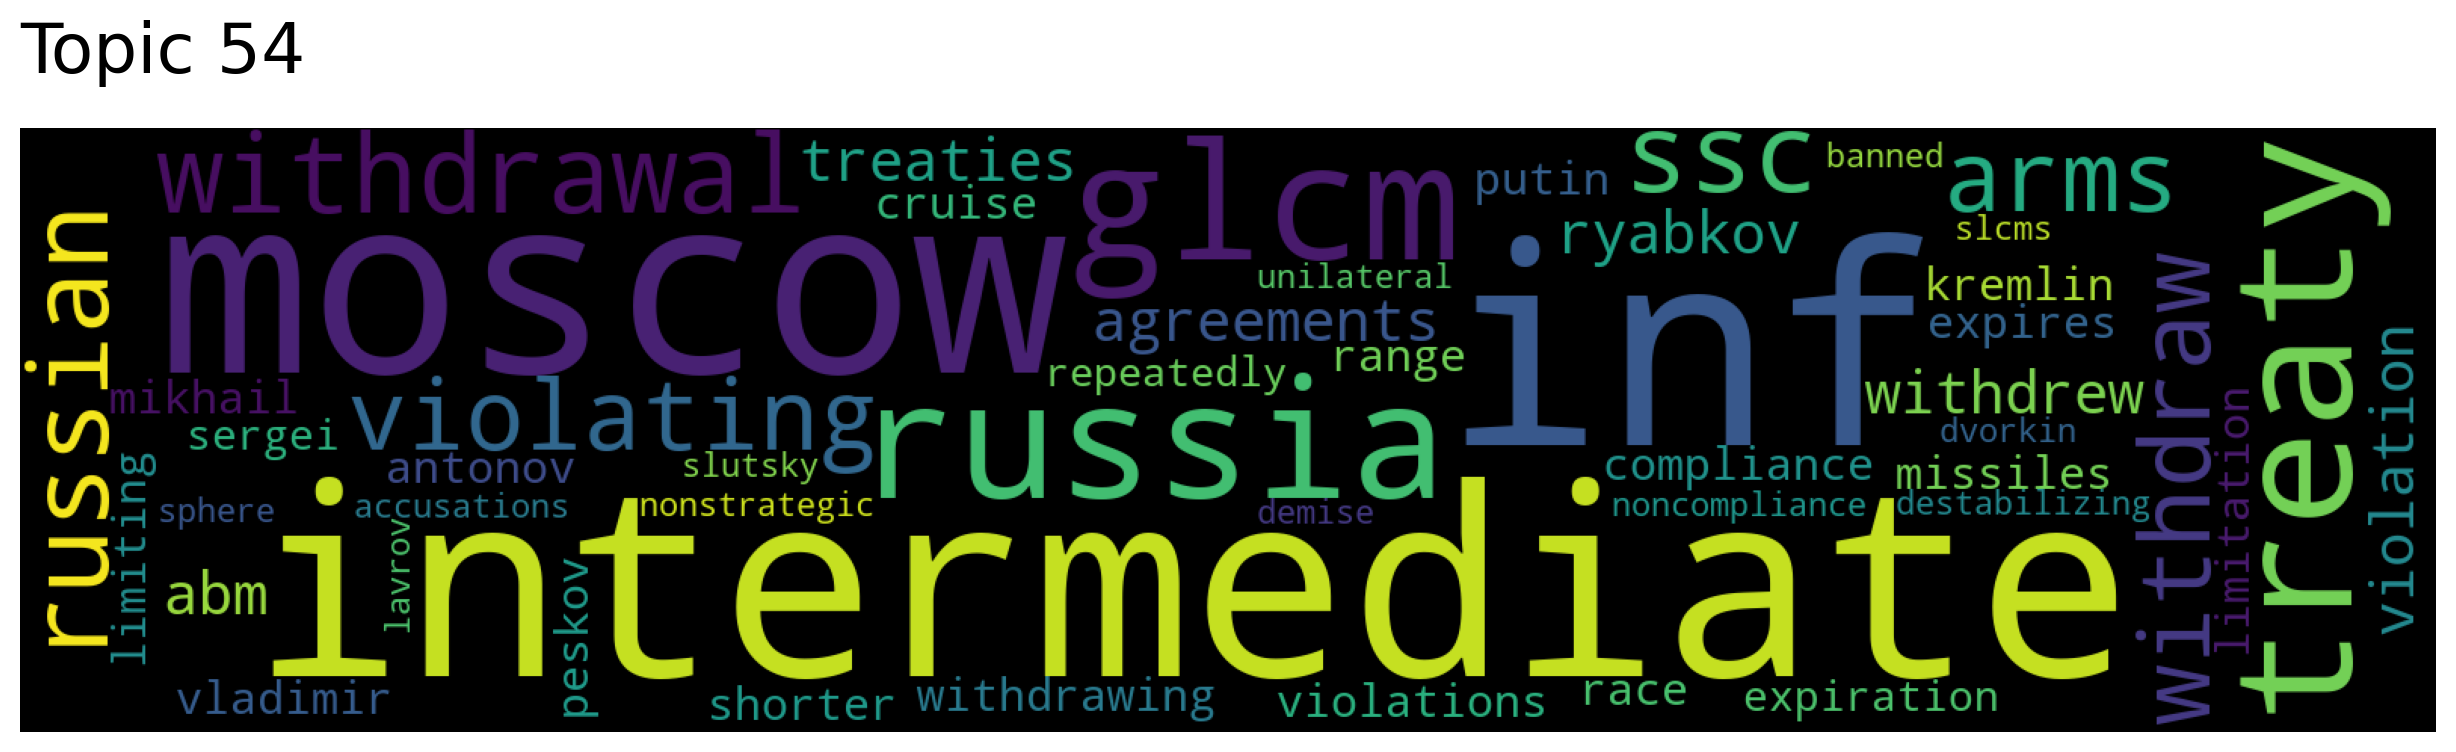

In [25]:
## built-in wordcloud vizzes
for topic in topic_nums[:2]:
    model.generate_topic_wordcloud(topic)

## Search Papers by Topic
Let's explore what a particular topic consists of

In [29]:
documents, document_scores, document_nums = model.search_documents_by_topic(
    topic_num=0, 
    num_docs=5
)

In [30]:
documents

array(["  The SNP has accused David Cameron of a lack of respect towards Scotland after the Prime Minister ministers created a new cabinet sub-committee on Trident. The Tory leader has also order 10 new 'taskforces'- designed to push policy through Whitehall. The National Security Council (Nuclear Deterrence and Security) sub-committee will be chaired by the Prime Minister. Other members include the Chancellor George Osborne, the Foreign Secretary Philip Hammond the Home Secretary Theresa May and the Defence Secretary Michael Fallon. The Conservative government has pledged to push ahead with a like-for-like replacement of the ageing nuclear weapons system, despite opposition from most Scottish MPs. The party points to opinion polls which show that public feeling on the issue north of the border is more mixed. Credit: Kate Devlin  Database: Global Newsstream,ProQuest Central ",
       'FIRST Minister Alex Salmond and Tory leader David Cameron clashed last night over the future of the Tr

## Find Similar Words

In [32]:
words, word_scores = model.similar_words(
    keywords=["russia", "ukraine"], 
    # keywords_neg=[], 
    num_words=20
)

In [34]:
for word, score in zip(words, word_scores):
  print(word, score)

russian 0.8330687397609402
putin 0.7521552470682603
crimea 0.7505082450676802
moscow 0.7283397271486456
ukrainian 0.7077940206297755
kremlin 0.6799274768869933
vladimir 0.6742464572332231
nato 0.6336610552199439
kiev 0.6328095379064582
moldova 0.6207381641150487
belarus 0.6170336772757143
baltic 0.611482667160453
russians 0.6081780943946931
annexation 0.5891633378086824
georgia 0.5851470366439995
eastern 0.5825473224485791
europe 0.5703736215485209
baltics 0.5655151420609227
minsk 0.5615839481254279
poland 0.5579285636970464
